In [1]:
import pymysql
import pandas as pd

In [2]:
# Database connection details
db_config = {
    "host": "localhost",  # Change to your database host
    "user": "root",       # Change to your database username
    "password": "Harshama@26",  # Change to your database password
    "database": "sales"  # Change to your database name
}

In [57]:
queries = {
    "question1": """
        SELECT
            DATE_FORMAT(order_date, '%m') AS Month_ID,
            DATE_FORMAT(order_date, '%M') AS Month,
            DATE_FORMAT(order_date, '%Y') AS Year,
            SUM(after_discount) AS total_transaction
        FROM order_detail
        WHERE YEAR(order_date) = 2021 
          AND is_valid = 1
        GROUP BY Month_ID, Month, Year
        ORDER BY total_transaction DESC;
    """,

    "question2": """
        SELECT
            skudet.category,
            SUM(ordet.after_discount) AS total_transaction
        FROM
            order_detail AS ordet
        JOIN
            sku_detail AS skudet ON ordet.sku_id = skudet.id
        WHERE
            ordet.is_valid = 1 
            AND YEAR(ordet.order_date) = 2022
        GROUP BY
            skudet.category
        ORDER BY
            total_transaction DESC;
    """,

    "question3": """
        WITH final_table AS (
            SELECT
                skudet.category,
                SUM(CASE WHEN YEAR(ordet.order_date) = 2021 THEN ordet.after_discount END) AS transaction_2021,
                SUM(CASE WHEN YEAR(ordet.order_date) = 2022 THEN ordet.after_discount END) AS transaction_2022
            FROM order_detail AS ordet
            JOIN sku_detail AS skudet ON ordet.sku_id = skudet.id
            WHERE ordet.is_valid = 1
            GROUP BY skudet.category
        )
        SELECT *,
               (transaction_2022 - transaction_2021) AS delta,
               CASE 
                   WHEN transaction_2022 > transaction_2021 THEN 'INCREASE' 
                   ELSE 'DECREASE' 
               END AS remark
        FROM final_table;
    """,

    "question4": """
        SELECT
            paydet.payment_method,
            COUNT(DISTINCT ordet.id) AS freq
        FROM
            order_detail AS ordet
        JOIN
            payment_detail AS paydet ON ordet.payment_id = paydet.id
        WHERE
            ordet.is_valid = 1 
            AND YEAR(ordet.order_date) = 2022
        GROUP BY
            paydet.payment_method
        ORDER BY
            freq DESC
        LIMIT 5;
    """,

    "question5": """
        WITH final_table AS (
            SELECT
                CASE
                    WHEN LOWER(skudet.sku_name) LIKE '%samsung%' THEN 'Samsung'
                    WHEN LOWER(skudet.sku_name) LIKE '%apple%' 
                         OR LOWER(skudet.sku_name) LIKE '%iphone%' 
                         OR LOWER(skudet.sku_name) LIKE '%macbook%' THEN 'Apple'
                    WHEN LOWER(skudet.sku_name) LIKE '%sony%' THEN 'Sony'
                    WHEN LOWER(skudet.sku_name) LIKE '%huawei%' THEN 'Huawei'
                    WHEN LOWER(skudet.sku_name) LIKE '%lenovo%' THEN 'Lenovo'
                END AS product_brand,
                SUM(ordet.after_discount) AS total_transaction
            FROM
                order_detail AS ordet
            JOIN
                sku_detail AS skudet ON ordet.sku_id = skudet.id
            WHERE
                ordet.is_valid = 1
            GROUP BY
                product_brand
        )
        SELECT *
        FROM final_table
        WHERE product_brand IS NOT NULL
        ORDER BY total_transaction DESC;
    """,

    "question6": """
        -- Find the top 3 customers with the highest total transaction value in 2022
        SELECT
            customer_id,
            SUM(after_discount) AS total_spent
        FROM order_detail
        WHERE is_valid = 1
          AND YEAR(order_date) = 2022
        GROUP BY customer_id
        ORDER BY total_spent DESC
        LIMIT 3;
    """,

    "question7": """
        -- Monthly transaction trend in 2022
        SELECT
            DATE_FORMAT(order_date, '%Y-%m') AS month,
            SUM(after_discount) AS total_transaction
        FROM order_detail
        WHERE is_valid = 1 AND YEAR(order_date) = 2022
        GROUP BY month
        ORDER BY month;
    """,

    "question8": """
        -- Average discount amount per transaction per category in 2022
        SELECT
            skudet.category,
            AVG(ordet.discount_amount) AS avg_discount
        FROM order_detail AS ordet
        JOIN sku_detail AS skudet ON ordet.sku_id = skudet.id
        WHERE ordet.is_valid = 1
          AND YEAR(ordet.order_date) = 2022
        GROUP BY skudet.category
        ORDER BY avg_discount DESC;
    """,

    "question9": """
        -- Find the day with the highest number of valid transactions in 2022
        SELECT
            order_date,
            COUNT(*) AS total_orders
        FROM order_detail
        WHERE is_valid = 1
          AND YEAR(order_date) = 2022
        GROUP BY order_date
        ORDER BY total_orders DESC
        LIMIT 1;
    """,

    "question10": """
        -- Get the number of valid vs invalid transactions in 2022
        SELECT
            is_valid,
            COUNT(*) AS total_transactions
        FROM order_detail
        WHERE YEAR(order_date) = 2022
        GROUP BY is_valid;
    """
}


In [58]:
from IPython.display import display


In [59]:
# Connect to the database
try:
    connection = pymysql.connect(**db_config)
    print("Database connection successful!")
    
    # Execute each query and display results
    for question, query in queries.items():
        print(f"\n--- {question} ---")
        df = pd.read_sql(query, connection)
        display(df)  # Display the DataFrame in the notebook
        
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed.")

Database connection successful!

--- question1 ---


C:\Users\Asus\AppData\Local\Temp\ipykernel_16272\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,Month_ID,Month,Year,total_transaction
0,08,August,2021,2.249434e+08
1,12,December,2021,2.158624e+08
2,10,October,2021,2.069659e+08
3,11,November,2021,1.790446e+08
4,07,July,2021,1.479654e+08
5,09,September,2021,1.421678e+08
6,06,June,2021,3.813349e+07
7,01,January,2021,3.682213e+07
8,02,February,2021,3.561180e+07
9,05,May,2021,3.366361e+07



--- question2 ---


C:\Users\Asus\AppData\Local\Temp\ipykernel_16272\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,category,total_transaction
0,Mobiles & Tablets,9.128256e+08
1,Entertainment,3.611392e+08
2,Appliances,3.095840e+08
3,Computing,2.124082e+08
4,Men Fashion,1.333326e+08
5,Women Fashion,9.023613e+07
6,Home & Living,7.865896e+07
7,Health & Sports,5.200838e+07
8,Beauty & Grooming,4.559842e+07
9,Superstore,3.264327e+07



--- question3 ---


C:\Users\Asus\AppData\Local\Temp\ipykernel_16272\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,category,transaction_2021,transaction_2022,delta,remark
0,Kids & Baby,2.373622e+07,2.571818e+07,1.981969e+06,INCREASE
1,Men Fashion,5.787478e+07,1.333326e+08,7.545786e+07,INCREASE
2,Computing,1.728789e+08,2.124082e+08,3.952934e+07,INCREASE
3,School & Education,1.138840e+07,1.730505e+07,5.916641e+06,INCREASE
4,Women Fashion,8.404596e+07,9.023613e+07,6.190171e+06,INCREASE
5,Superstore,2.861523e+07,3.264327e+07,4.028039e+06,INCREASE
6,Appliances,2.185502e+08,3.095840e+08,9.103381e+07,INCREASE
7,Entertainment,1.523808e+08,3.611392e+08,2.087583e+08,INCREASE
8,Mobiles & Tablets,3.706067e+08,9.128256e+08,5.422189e+08,INCREASE
9,Health & Sports,3.316841e+07,5.200838e+07,1.883997e+07,INCREASE



--- question4 ---


C:\Users\Asus\AppData\Local\Temp\ipykernel_16272\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,payment_method,freq
0,cod,1809
1,Payaxis,181
2,customercredit,75
3,Easypay,69
4,jazzwallet,26



--- question5 ---


C:\Users\Asus\AppData\Local\Temp\ipykernel_16272\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,product_brand,total_transaction
0,Samsung,5.781356e+08
1,Apple,4.448554e+08
2,Huawei,6.316026e+07
3,Sony,6.239182e+07
4,Lenovo,6.237980e+07


C:\Users\Asus\AppData\Local\Temp\ipykernel_16272\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)



--- question6 ---


,customer_id,total_spent
0,C460487L,518752000.0
1,C374672L,77056364.0
2,C514596L,60289784.0



--- question7 ---


C:\Users\Asus\AppData\Local\Temp\ipykernel_16272\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,month,total_transaction
0,2022-01,2.382459e+08
1,2022-02,1.718025e+08
2,2022-03,2.603872e+08
3,2022-04,2.708197e+08
4,2022-05,2.064670e+08
5,2022-06,1.134963e+08
6,2022-07,2.603412e+08
7,2022-08,7.524942e+07
8,2022-09,5.592902e+08
9,2022-10,5.585571e+07



--- question8 ---


C:\Users\Asus\AppData\Local\Temp\ipykernel_16272\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,category,avg_discount
0,Computing,10598.619444
1,Appliances,9250.756303
2,Entertainment,8310.418107
3,Superstore,4641.701337
4,Health & Sports,4525.002472
5,Mobiles & Tablets,4461.538462
6,Women Fashion,3479.834854
7,Others,2695.361316
8,Men Fashion,2491.503311
9,Home & Living,2078.257302



--- question9 ---


C:\Users\Asus\AppData\Local\Temp\ipykernel_16272\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,order_date,total_orders
0,2022-02-20,14



--- question10 ---


C:\Users\Asus\AppData\Local\Temp\ipykernel_16272\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,is_valid,total_transactions
0,0,1023
1,1,2179


Database connection closed.


In [7]:
import os


In [8]:
# Database connection details
db_config = {
    "host": "localhost",  # Change to your database host
    "user": "root",       # Change to your database username
    "password": "Harshama@26",  # Change to your database password
    "database": "sales"  # Change to your database name
}

In [9]:
# Folder path to save CSV files
output_folder = r"C:\Users\Asus\Downloads\google looker project\dataset"  # Replace with your folder path
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist

In [10]:
# List of tables to export
tables = ["order_detail", "sku_detail", "payment_detail","customer_detail"]  # Add your table names here

In [11]:
try:
    # Connect to the database
    connection = pymysql.connect(**db_config)
    print("Database connection successful!")

    for table in tables:
        print(f"Exporting table: {table}")
        
        # SQL query to fetch all data from the table
        query = f"SELECT * FROM {table};"
        
        # Read table data into a DataFrame
        df = pd.read_sql(query, connection)
        
        # Save the DataFrame to a CSV file
        output_file = os.path.join(output_folder, f"{table}.csv")
        df.to_csv(output_file, index=False)
        
        print(f"Table {table} exported successfully to {output_file}.")

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed.")

C:\Users\Asus\AppData\Local\Temp\ipykernel_16272\1590211234.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Database connection successful!
Exporting table: order_detail
Table order_detail exported successfully to C:\Users\Asus\Downloads\google looker project\dataset\order_detail.csv.
Exporting table: sku_detail
Table sku_detail exported successfully to C:\Users\Asus\Downloads\google looker project\dataset\sku_detail.csv.
Exporting table: payment_detail
Table payment_detail exported successfully to C:\Users\Asus\Downloads\google looker project\dataset\payment_detail.csv.
Exporting table: customer_detail
Table customer_detail exported successfully to C:\Users\Asus\Downloads\google looker project\dataset\customer_detail.csv.
Database connection closed.


In [12]:
df_od = pd.read_csv(r"C:\Users\Asus\Downloads\order_detail.csv")
df_sd = pd.read_csv(r"C:\Users\Asus\Downloads\sku_detail.csv", on_bad_lines='skip')
df_pd = pd.read_csv(r"C:\Users\Asus\Downloads\payment_detail.csv")
df_cd = pd.read_csv(r"C:\Users\Asus\Downloads\customer_detail.csv")

In [13]:
df_sd.rename(columns={'id': 'sku_id'}, inplace=True)
df_cd.rename(columns={'id': 'customer_id'}, inplace=True)
df_pd.rename(columns={'id': 'payment_id'}, inplace=True)

In [14]:
df = pd.DataFrame(df_od\
                  # Merge order_detail with sku_detail on column sku_id
                  .merge(df_sd, how='left', on='sku_id')\
                  # Merge the result to customer_detail on column customer_id
                  .merge(df_cd, how='left', on='customer_id')\
                  # Merge the result to payment_detail on column payment_id
                  .merge(df_pd, how='left', on='payment_id')
                  )

In [15]:
# check the dataframe information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5858 entries, 0 to 5857
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5858 non-null   object 
 1   customer_id      5858 non-null   object 
 2   order_date       5858 non-null   object 
 3   sku_id           5858 non-null   object 
 4   price            5858 non-null   int64  
 5   qty_ordered      5858 non-null   int64  
 6   before_discount  5858 non-null   float64
 7   discount_amount  5858 non-null   float64
 8   after_discount   5858 non-null   float64
 9   is_gross         5858 non-null   int64  
 10  is_valid         5858 non-null   int64  
 11  is_net           5858 non-null   int64  
 12  payment_id       5858 non-null   int64  
 13  sku_name         5854 non-null   object 
 14  base_price       5854 non-null   float64
 15  cogs             5854 non-null   float64
 16  category         5854 non-null   object 
 17  registered_dat

In [16]:
print(df_pd.columns)


Index(['payment_id', 'payment_method'], dtype='object')


In [17]:
print(df_od.columns)


Index(['id', 'customer_id', 'order_date', 'sku_id', 'price', 'qty_ordered',
       'before_discount', 'discount_amount', 'after_discount', 'is_gross',
       'is_valid', 'is_net', 'payment_id'],
      dtype='object')


In [18]:
# Ensure both columns have the same data type before merging
df_pd['payment_id'] = df_pd['payment_id'].astype(str)  # Convert to string
df_od['id'] = df_od['id'].astype(str)                  # Convert to string

# Merge order_detail with payment_detail without renaming columns
df_sample = pd.merge(df_pd, df_od, how='left', left_on='payment_id', right_on='id')

# Display info about the resulting DataFrame
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   payment_id_x     16 non-null     object 
 1   payment_method   16 non-null     object 
 2   id               0 non-null      object 
 3   customer_id      0 non-null      object 
 4   order_date       0 non-null      object 
 5   sku_id           0 non-null      object 
 6   price            0 non-null      float64
 7   qty_ordered      0 non-null      float64
 8   before_discount  0 non-null      float64
 9   discount_amount  0 non-null      float64
 10  after_discount   0 non-null      float64
 11  is_gross         0 non-null      float64
 12  is_valid         0 non-null      float64
 13  is_net           0 non-null      float64
 14  payment_id_y     0 non-null      float64
dtypes: float64(9), object(6)
memory usage: 2.0+ KB


In [19]:
# change columns to datetime format using for loop
# use pandas.to_datetime to convert
for x in ['order_date', 'registered_date']:
  df[x] = pd.to_datetime(df[x])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5858 entries, 0 to 5857
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               5858 non-null   object        
 1   customer_id      5858 non-null   object        
 2   order_date       5858 non-null   datetime64[ns]
 3   sku_id           5858 non-null   object        
 4   price            5858 non-null   int64         
 5   qty_ordered      5858 non-null   int64         
 6   before_discount  5858 non-null   float64       
 7   discount_amount  5858 non-null   float64       
 8   after_discount   5858 non-null   float64       
 9   is_gross         5858 non-null   int64         
 10  is_valid         5858 non-null   int64         
 11  is_net           5858 non-null   int64         
 12  payment_id       5858 non-null   int64         
 13  sku_name         5854 non-null   object        
 14  base_price       5854 non-null   float64

Question 1
Dear Data Analyst,

As part of our Year-End Festival competition, the company plans to award prizes to our top customers. To facilitate this, the Marketing Team requires an analysis to estimate the prizes for the winners. Specifically, we need data on the TOP 5 Products in the Mobiles & Tablets Category for the year 2022, ranked by the highest sales quantities (where valid = 1). We would appreciate it if you could compile and share this information with us before the end of this month to ensure we meet our planning deadlines.

In [20]:
# Answer No 1
top_5_prod = pd.DataFrame(\
                          # filter the columns as needed
                          df[(df['category']=='Mobiles & Tablets') & (df['is_valid']==1) & (df['order_date'].dt.year == 2022)]\
                          # aggregate using groupby method
                          .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                          # reset the index to convert result into dataframe
                          .reset_index(name='qty_ordered')\
                          # sort the value from the largest to the lowest
                          .sort_values(by='qty_ordered', ascending=False)\
                          # select top 5 row
                          .head(5).reset_index(drop=True)
                          )
top_5_prod

,sku_name,category,qty_ordered
0,IDROID_BALRX7-Gold,Mobiles & Tablets,1000
1,IDROID_BALRX7-Jet black,Mobiles & Tablets,31
2,Infinix Hot 4-Gold,Mobiles & Tablets,15
3,samsung_Grand Prime Plus-Black,Mobiles & Tablets,11
4,infinix_Zero 4-Grey,Mobiles & Tablets,10


<Axes: title={'center': 'TOP 5 Products'}, xlabel='Product Name', ylabel='Quantity'>

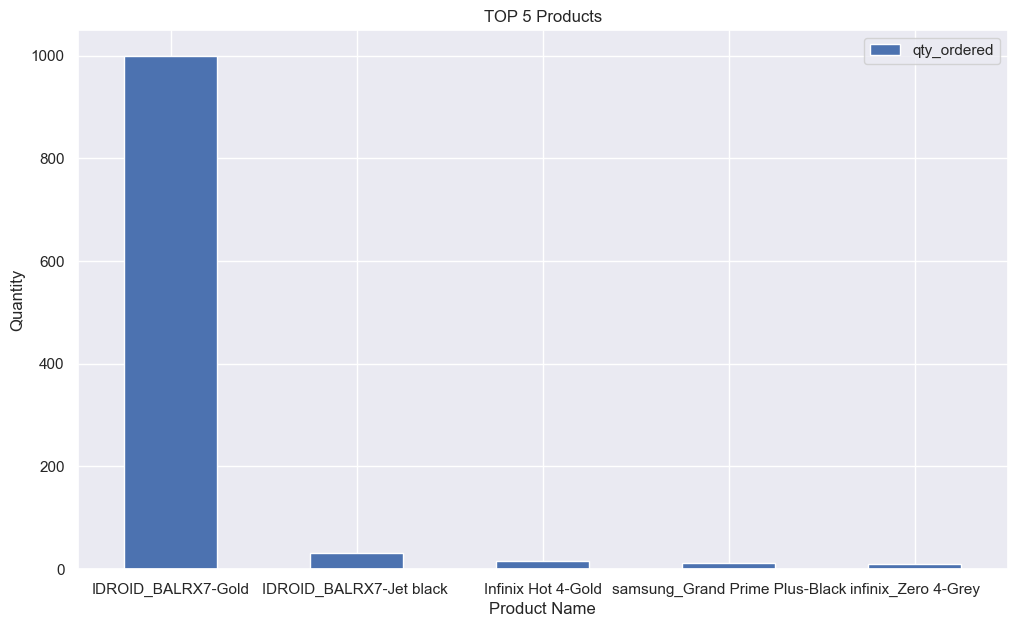

In [21]:
# show the chart
import seaborn as sns
# plot
sns.set()
top_5_prod.plot(x='sku_name',
           y=['qty_ordered'],
           kind='bar',
           grid = True,
           xlabel = 'Product Name',
           ylabel = 'Quantity',
           figsize=(12,7),
           rot = 0,
           title = 'TOP 5 Products',
           table = False,
           secondary_y = False)

<Axes: title={'center': 'TOP 5 Products'}, xlabel='Quantity', ylabel='Product Name'>

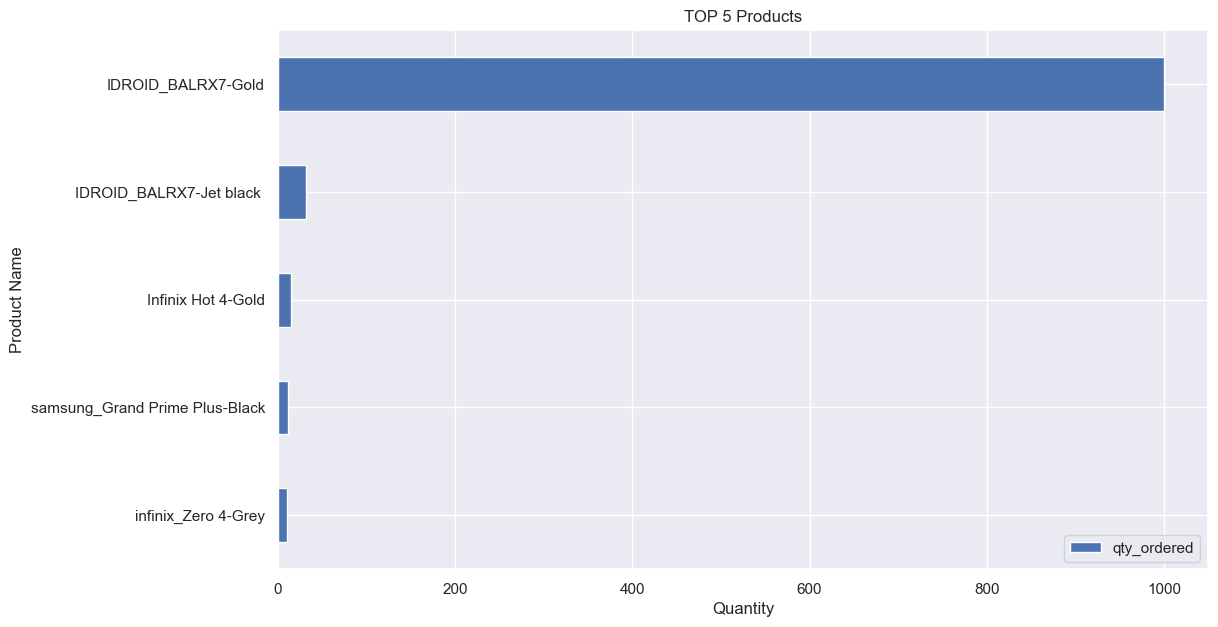

In [22]:
# show the chart
# change sort to ascending to show the highest from top to bottow on horizontal bar chart
top_5_prod.sort_values(by='qty_ordered', ascending=True, inplace=True)

# plot
sns.set()
top_5_prod.plot(x='sku_name',
           y=['qty_ordered'],
           kind='barh', # barh for horizontal bar chart
           grid = True,
           xlabel = 'Quantity',
           ylabel = 'Product Name',
           figsize=(12,7),
           rot = 0,
           title = 'TOP 5 Products',
           table = False,
           secondary_y = False)

Question 2
Dear Data Analyst,

Following a recent discussion between the Warehouse and Marketing Teams, we have identified a notable surplus in stock for products in the “Others” category as of the end of 2022.

We kindly request your assistance in analyzing the sales data for this category for 2021, specifically focusing on sales quantity. We suspect there has been a decline in sales quantity in 2022 compared to 2021. (Please also include data for the 15th category.)

If a decrease in sales quantity for the “Others” category is confirmed, we would appreciate it if you could provide details of the top 20 products that experienced the largest decrease in sales between 2022 and 2021. This information will support our discussion in the upcoming meeting.

In [23]:
# Answer 2.1
# Create dataframe of all category, year 2021, aggregated by qty_ordered (sum)
cat_data_2021 = pd.DataFrame(\
                           # filter is_valid = 1 and year 2021
                           df[(df['is_valid']==1) & (df['order_date'].dt.year == 2021)]\
                           # groupby quantity
                           .groupby(by=['category'])['qty_ordered'].sum()\
                           # convert to dataframe
                           .reset_index(name='qty_ordered_2021')
                           )

# Create dataframe of all category, year 2022, aggregated by qty_ordered (sum)
cat_data_2022 = pd.DataFrame(\
                           # filter is_valid = 1 and year 2021
                           df[(df['is_valid']==1) & (df['order_date'].dt.year == 2022)]\
                           # groupby quantity
                           .groupby(by=['category'])['qty_ordered'].sum()\
                           # convert to dataframe
                           .reset_index(name='qty_ordered_2022')
                           )

# join those 2 dataframes
cat_data_2021_2022 = cat_data_2021.merge(cat_data_2022, how='outer', on='category')

# show
cat_data_2021_2022

,category,qty_ordered_2021,qty_ordered_2022
0,Appliances,124,146
1,Beauty & Grooming,168,153
2,Books,171,195
3,Computing,109,153
4,Entertainment,75,147
5,Health & Sports,173,199
6,Home & Living,193,250
7,Kids & Baby,170,227
8,Men Fashion,236,174
9,Mobiles & Tablets,107,1153


In [24]:
# add new column named 'qty_growth' 
cat_data_2021_2022['qty_growth'] = cat_data_2021_2022['qty_ordered_2022'] - cat_data_2021_2022['qty_ordered_2021']

# add new column name 'growth_percentage'
cat_data_2021_2022 = cat_data_2021_2022.assign(growth_percentage=lambda x: round((x['qty_growth'] / x['qty_ordered_2021'] * 100),2))

# add new column 'remark' in order to classify the 'qty_growth' using a function to calculate
def updown_check(delta):
  if delta < 0:
    return 'DOWN'
  elif delta == 0:
    return 'FAIR'
  else:
    return 'UP'

# add new column 'remark'
cat_data_2021_2022['remark'] = cat_data_2021_2022['qty_growth'].apply(updown_check)

# sort from the smallest to largest on column qty_growth and reset the index
cat_data_2021_2022.sort_values(by='qty_growth', ascending=True, inplace=True)
cat_data_2021_2022.reset_index(drop=True, inplace=True)

# show the data
cat_data_2021_2022

,category,qty_ordered_2021,qty_ordered_2022,qty_growth,growth_percentage,remark
0,Others,426,263,-163,-38.26,DOWN
1,Soghaat,759,612,-147,-19.37,DOWN
2,Men Fashion,236,174,-62,-26.27,DOWN
3,Beauty & Grooming,168,153,-15,-8.93,DOWN
4,Appliances,124,146,22,17.74,UP
5,Books,171,195,24,14.04,UP
6,Health & Sports,173,199,26,15.03,UP
7,Computing,109,153,44,40.37,UP
8,School & Education,184,237,53,28.80,UP
9,Home & Living,193,250,57,29.53,UP


Text(0.5, 0, 'Quantity')

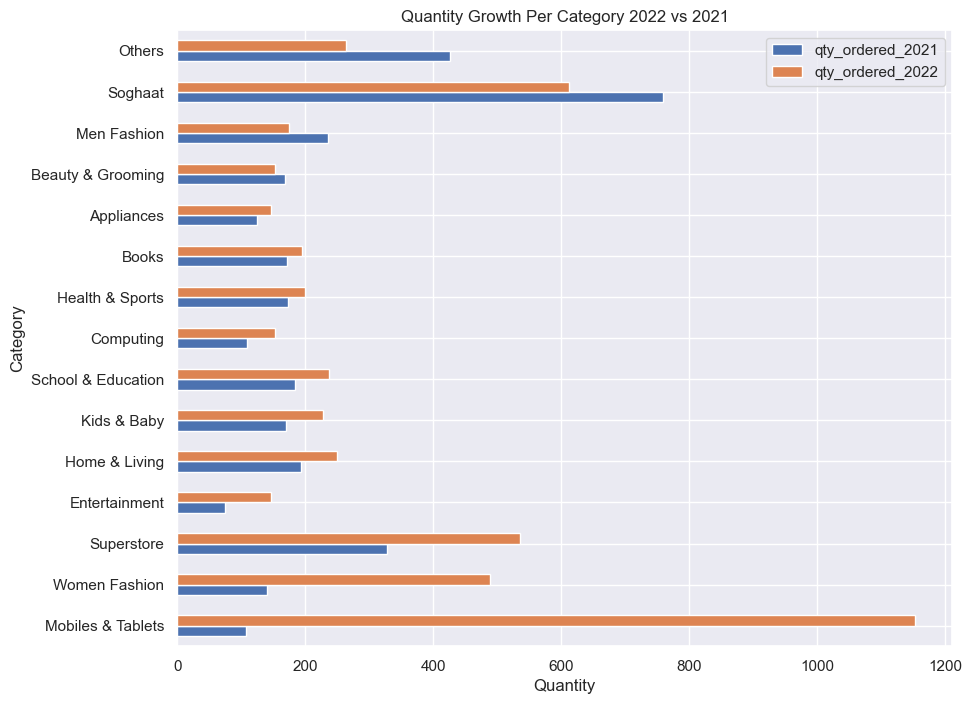

In [25]:
import matplotlib.pyplot as plt
# sort before plot
cat_data_2021_2022.sort_values(by='qty_growth', ascending=False, inplace=True)

# plot to show qty_ordered_2021 and qty_ordered_2022, horizontal bar
sns.set()
cat_data_2021_2022.plot(x='category',\
                        y=['qty_ordered_2021','qty_ordered_2022'],\
                        kind='barh',\
                        figsize=(10, 8)\
                        )
plt.title('Quantity Growth Per Category 2022 vs 2021')
plt.ylabel('Category')
plt.xlabel('Quantity')

Text(0.5, 0, 'Quantity')

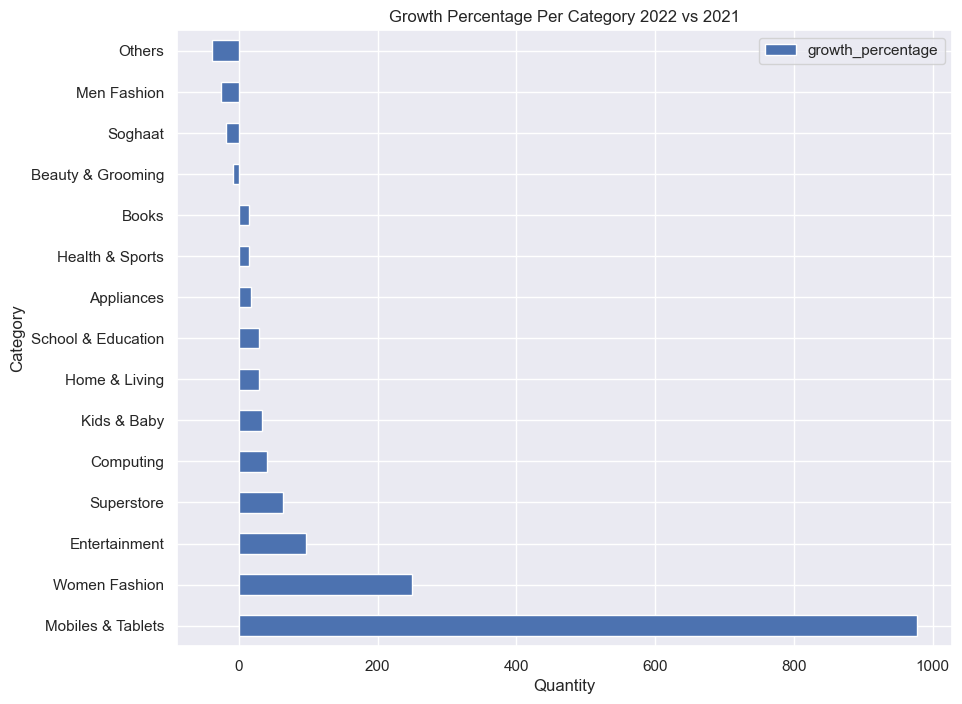

In [26]:
# sort before plot
cat_data_2021_2022.sort_values(by='growth_percentage', ascending=False, inplace=True)

# show growth_percentage
sns.set()
cat_data_2021_2022.plot(x='category',\
                        y=['growth_percentage'],\
                        kind='barh',\
                        figsize=(10, 8)\
                        )
plt.title('Growth Percentage Per Category 2022 vs 2021')
plt.ylabel('Category')
plt.xlabel('Quantity')

In [27]:
# Answer 2.2

# Create dataframe with filter category = Others, year of 2022, is_valid = 1
# Aggregate qty_ordered (sum)
others_2022 = pd.DataFrame(\
                           # filter 2022
                           df[(df['category']=='Others') & (df['is_valid']==1)\
                              & (df['order_date'].dt.year == 2022)]\
                           # groupby, aggregate qty_ordered, include sku_name (product name)
                           .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                           # convert series to dataframe
                           .reset_index(name='qty_ordered_2022')
                           )

# Create dataframe with filter category = Others, year of 2021, is_valid = 1
# Aggregate qty_ordered (sum)
others_2021 = pd.DataFrame(\
                           # filter 2021
                           df[(df['category']=='Others') & (df['is_valid']==1)\
                              & (df['order_date'].dt.year == 2021)]\
                           # groupby, aggregate qty_ordered, include sku_name (product name)
                           .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                           # convert series to dataframe
                           .reset_index(name='qty_ordered_2021')
                           )

# JOIN the dataframes
others_2021_2022 = others_2021.merge(others_2022[['sku_name', 'qty_ordered_2022']], how='outer', on='sku_name')

# show the data
others_2021_2022

,sku_name,category,qty_ordered_2021,qty_ordered_2022
0,Aladdin_Wrench_Snap N Grip_01,Others,1.0,NaN
1,Aladdin_bike_cover,Others,3.0,2.0
2,Am-PTV_ATS-004-M,Others,5.0,NaN
3,BFV_Black Friday voucher Rs 1500,Others,1.0,NaN
4,BFV_Black Friday voucher Rs 2000,Others,1.0,NaN
...,...,...,...,...
162,stinnos_342,NaN,NaN,1.0
163,stoner_91381 A,NaN,NaN,1.0
164,stripyinterior_100004,NaN,NaN,1.0
165,sukoonbundle-sukoon10-cj_CJPOISL,NaN,NaN,1.0


In [28]:
# fill "NaN" with "Others" in column "category"
others_2021_2022['category'].fillna('Others', inplace=True)

# fill the rest "NaN" with 0
others_2021_2022.fillna(0, inplace=True)

# show the data
others_2021_2022

,sku_name,category,qty_ordered_2021,qty_ordered_2022
0,Aladdin_Wrench_Snap N Grip_01,Others,1.0,0.0
1,Aladdin_bike_cover,Others,3.0,2.0
2,Am-PTV_ATS-004-M,Others,5.0,0.0
3,BFV_Black Friday voucher Rs 1500,Others,1.0,0.0
4,BFV_Black Friday voucher Rs 2000,Others,1.0,0.0
...,...,...,...,...
162,stinnos_342,Others,0.0,1.0
163,stoner_91381 A,Others,0.0,1.0
164,stripyinterior_100004,Others,0.0,1.0
165,sukoonbundle-sukoon10-cj_CJPOISL,Others,0.0,1.0


In [29]:
# add column delta_2022_2021
others_2021_2022['delta_2022_2021'] = others_2021_2022['qty_ordered_2022'] - others_2021_2022['qty_ordered_2021']

# add column remark using function "updown_check"
others_2021_2022['remark'] = others_2021_2022['delta_2022_2021'].apply(updown_check)

# sort_values from the smallest to largest
others_2021_2022.sort_values(by='delta_2022_2021', ascending=True, inplace=True)

# reset the index
others_2021_2022.reset_index(drop=True, inplace=True)

# show the data
others_2021_2022

,sku_name,category,qty_ordered_2021,qty_ordered_2022,delta_2022_2021,remark
0,RB_Dettol Germ Busting Kit-bf,Others,200.0,45.0,-155.0,DOWN
1,Dawlance_MD 10 + DWB 600,Others,23.0,0.0,-23.0,DOWN
2,Telemall_MM-DR-HB-L,Others,23.0,2.0,-21.0,DOWN
3,iu_Tickets General Enclosure-Islamabad,Others,20.0,0.0,-20.0,DOWN
4,RS_Rehmat-e-Shereen Mix Mithai,Others,13.0,0.0,-13.0,DOWN
...,...,...,...,...,...,...
162,Entertainer Asia_Vouch 365-2017 BookLahore,Others,0.0,7.0,7.0,UP
163,TCF_Educate-a-Child-for-a-Month,Others,0.0,8.0,8.0,UP
164,shoppers stop_MagicGlass-3,Others,0.0,13.0,13.0,UP
165,SKMT_Medicine,Others,0.0,20.0,20.0,UP


C:\Users\Asus\AppData\Local\Temp\ipykernel_16272\1013559605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others_2021_2022.sort_values(by='delta_2022_2021', ascending=False, inplace=True)


Text(0.5, 0, 'Delta 2022_2021')

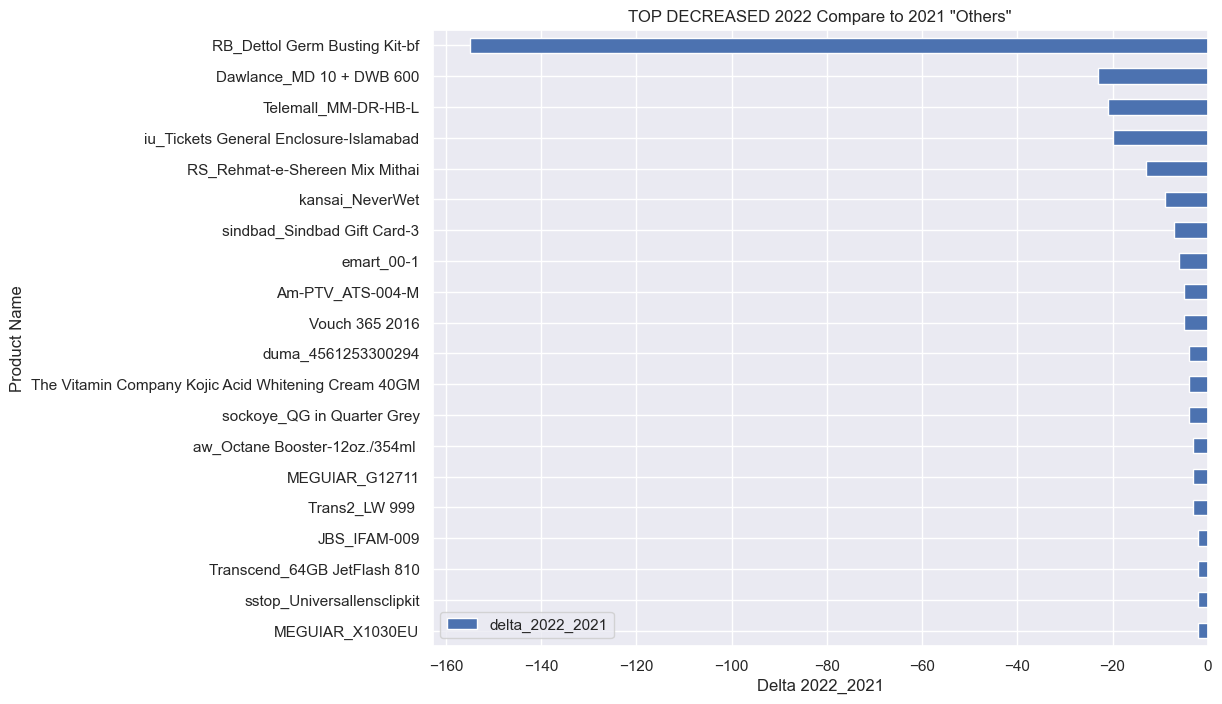

In [30]:
# choose 20 products to show (from the smallest)
others_2021_2022 = others_2021_2022.head(20)
others_2021_2022.sort_values(by='delta_2022_2021', ascending=False, inplace=True)

# plot
sns.set()
others_2021_2022.plot(x='sku_name',\
                      y='delta_2022_2021',\
                      kind='barh',\
                      figsize=(10, 8))
plt.title('TOP DECREASED 2022 Compare to 2021 "Others"')
plt.ylabel('Product Name')
plt.xlabel('Delta 2022_2021')

Question 3
Dear Data Analyst,

As we prepare for the company’s upcoming anniversary in two months, the Digital Marketing Team plans to share promotional information with customers by the end of this month. To support this initiative, we require data on customers who completed the check-out process but have not yet made a payment (is_gross = 1) during the year 2022. Specifically, we need the Customer IDs and their Registered Dates.

In [31]:
# define dataframe with filter as requested
cs_gross_data = df.loc[:,['customer_id', 'registered_date']][(df['is_gross']==1) & (df['is_valid']==0) & (df['is_net']==0) & (df['order_date'].dt.year == 2022)]

# show the data
cs_gross_data

,customer_id,registered_date
9,C246762L,2022-05-08
17,C848774L,2021-11-07
18,C693415L,2022-04-12
20,C180595L,2022-04-22
21,C587425L,2022-03-22
...,...,...
5830,C394076L,2021-10-12
5833,C248585L,2022-07-10
5839,C471304L,2022-05-13
5855,C265450L,2022-02-17


In [32]:
# Validation
# compare unique customer_id from the dataframe with count of dataframe index
# use function
def check_customerid(x):
  unique_customerid = len(x['customer_id'].unique().tolist())
  rows_count = len(x.index)
  return [unique_customerid,rows_count]

# run validation 
test = check_customerid(cs_gross_data)
print('Data Before : ', test)

Data Before :  [820, 1044]


In [33]:
# run the logic
if test[0] == test[1]:
  print('There is no duplicated data.')
else:
  print('There is duplicated data.')
  # remove the duplicate
  cs_gross_data.drop_duplicates(inplace=True)
  print('Data After : ', check_customerid(cs_gross_data))

# reset the index and show final data
cs_gross_data.reset_index(drop=True, inplace=True)
cs_gross_data

There is duplicated data.
Data After :  [820, 820]


,customer_id,registered_date
0,C246762L,2022-05-08
1,C848774L,2021-11-07
2,C693415L,2022-04-12
3,C180595L,2022-04-22
4,C587425L,2022-03-22
...,...,...
815,C653797L,2022-04-03
816,C394076L,2021-10-12
817,C248585L,2022-07-10
818,C471304L,2022-05-13


Question 4
Dear Data Analyst,

Between October and December 2022, we ran promotional campaigns every Saturday and Sunday. To evaluate their effectiveness, we would like your assistance in analyzing the following:

The average daily sales (before_discount) for weekends (Saturday and Sunday) compared to weekdays (Monday-Friday) for each month during this period. Please specify whether sales increased during weekends for each month.

The average daily sales (before_discount) for weekends versus weekdays across the entire three-month period.

In [34]:
# Answer No 4.1

# add column month_id, month_name, day_name, year
df['month_id'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.month_name()
df['day_name'] = df['order_date'].dt.day_name()
df['year'] = df['order_date'].dt.year


In [35]:
# Create dataframe for weekends data October-December 2022
data_weekends = pd.DataFrame(\
                             # filter
                             df[(df['is_valid'] == 1) &\
                              (df['day_name'].isin(['Saturday', 'Sunday'])) &\
                              (df['month_id'] >= 10) &\
                               (df['year'] == 2022)]\
                             # groupby, aggregate before_discount
                             .groupby(by=['month_id', 'month_name', 'year'])['before_discount'].mean()\
                             # round
                             .round(2)\
                             # convert series to dataframe
                             .reset_index(name='avg_sales_weekends')\
                             .sort_values(by='month_id', ascending=True)
                             )

# Create dataframe for weekdays data October-December 2022
data_weekdays = pd.DataFrame(\
                             # filter
                             df[(df['is_valid'] == 1) &\
                              (df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &\
                              (df['month_id'] >= 10) &\
                               (df['year'] == 2022)]\
                             # groupby, aggregate before_discount
                             .groupby(by=['month_id', 'month_name', 'year'])['before_discount'].mean()\
                             # round
                             .round(2)\
                             # convert series to dataframe
                             .reset_index(name='avg_sales_weekdays')\
                             .sort_values(by='month_id', ascending=True)
                             )

# merge the dataframe
data_weekdays_weekends = data_weekdays.merge(data_weekends)

# show the data
data_weekdays_weekends

,month_id,month_name,year,avg_sales_weekdays,avg_sales_weekends
0,10,October,2022,874690.27,634260.07
1,11,November,2022,641862.00,607794.21
2,12,December,2022,813574.29,410599.40


<Axes: xlabel='Month Name', ylabel='Average Sales'>

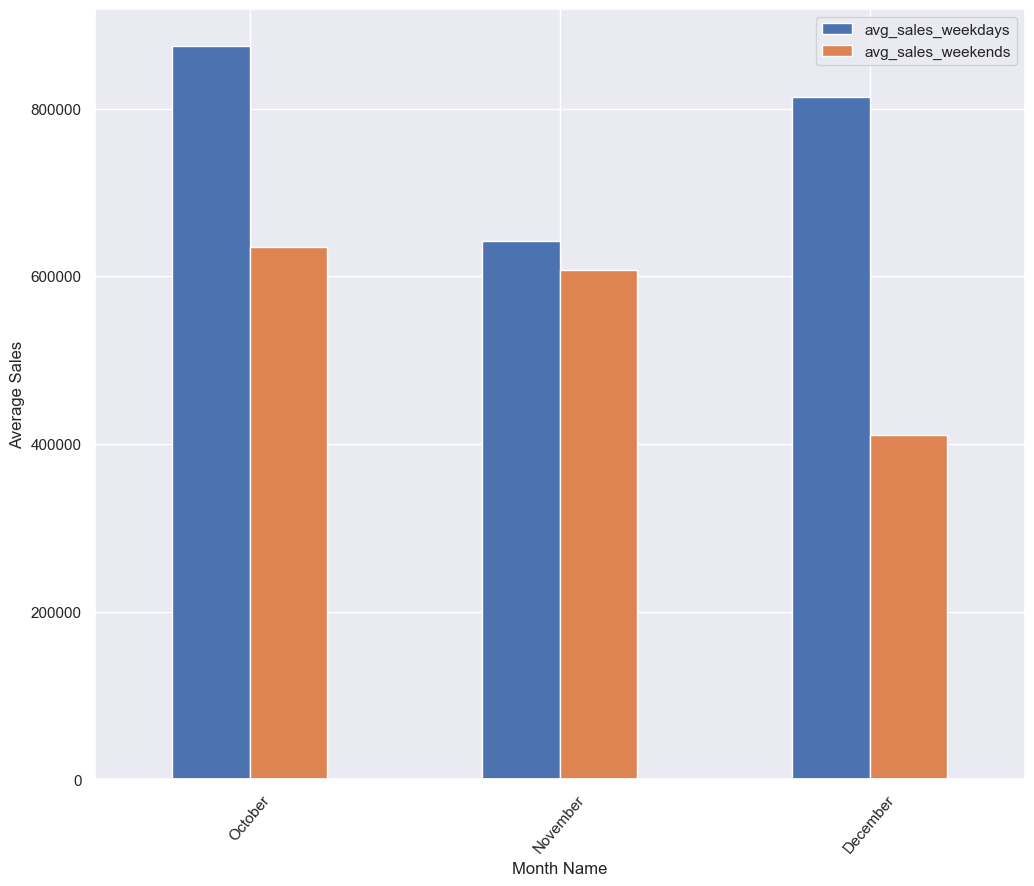

In [36]:
# plot the data
sns.set()
data_weekdays_weekends.plot(x='month_name',
                            y=['avg_sales_weekdays','avg_sales_weekends'],
                            kind='bar',
                            grid = True,
                            xlabel = 'Month Name',
                            ylabel = 'Average Sales',
                            figsize=(12,10),
                            rot = 50,  # for rotate the text in xlabel
                            table = False,
                            secondary_y = False)

In [37]:
# Answer No 4.2

# Filter dataframe df for weekends, October-December 2022
data_weekends_all = df[(df['is_valid'] == 1) &\
                    (df['day_name'].isin(['Saturday', 'Sunday'])) &\
                    (df['month_id'] >= 10) &\
                      (df['year'] == 2022)]

# Filter dataframe df for weekdays, October-December 2022
data_weekdays_all = df[(df['is_valid'] == 1) &\
                    (df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &\
                    (df['month_id'] >= 10) &\
                      (df['year'] == 2022)]

# Create dictionary
all_month_avg_compare = {\
                        'Period':'Total 3 months',\
                        'Avg Weekdays Sales': round(data_weekdays_all['before_discount'].mean(),2),\
                        'Avg Weekends Sales': round(data_weekends_all['before_discount'].mean(),2),\
                        'Diff (Value)': round(data_weekends_all['before_discount'].mean() - data_weekdays_all['before_discount'].mean(),2),\
                        'Diff (%)': pd.Series(round(((data_weekends_all['before_discount'].mean() - data_weekdays_all['before_discount'].mean())/data_weekends_all['before_discount'].mean())*100,2), dtype=str)+'%'
                        }

# create dataframe from dictionary
compare_avg_weekends_weekdays = pd.DataFrame(data=all_month_avg_compare, index=[0])

# show the data
compare_avg_weekends_weekdays

,Period,Avg Weekdays Sales,Avg Weekends Sales,Diff (Value),Diff (%)
0,Total 3 months,770146.01,558865.15,-211280.86,-37.81%


<Axes: xlabel='Period', ylabel='Average Sales'>

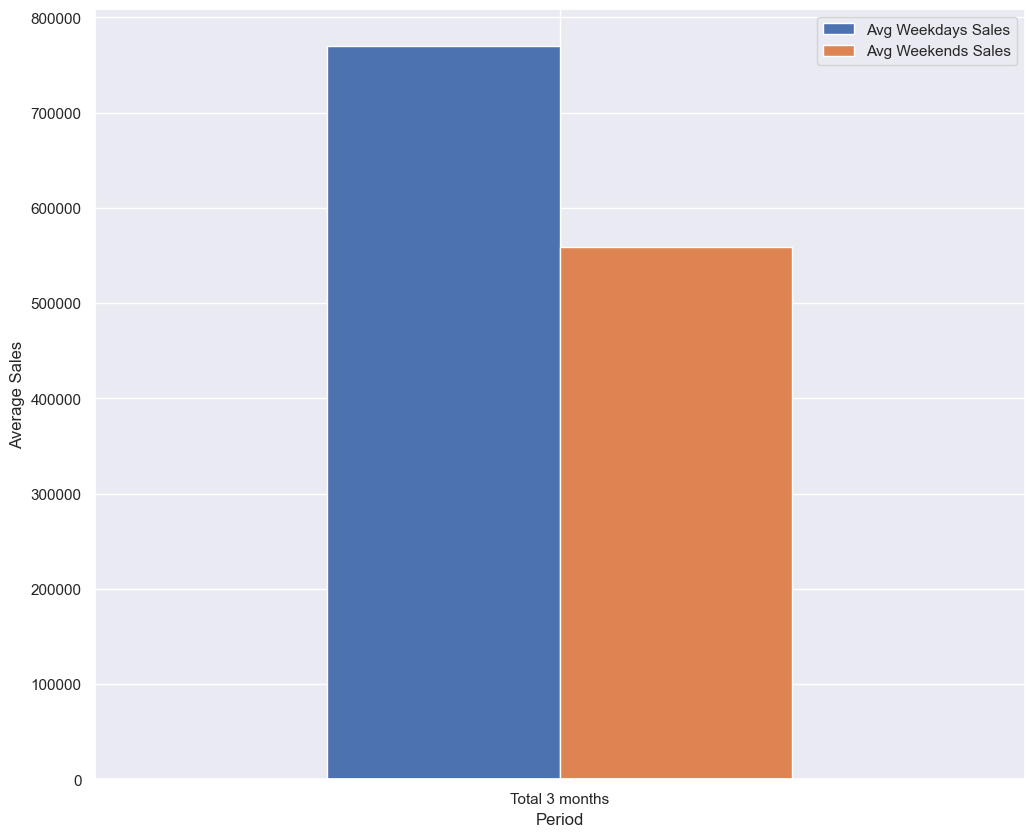

In [38]:
# plot the data
sns.set()
compare_avg_weekends_weekdays.plot(x='Period',
                                  y=['Avg Weekdays Sales','Avg Weekends Sales'],
                                  kind='bar',
                                  grid = True,
                                  # xlabel = 'Month Name',
                                  ylabel = 'Average Sales',
                                  figsize=(12,10),
                                  rot = 0,  # for rotate the text in xlabel
                                  table = False,
                                  secondary_y = False)

Question 1

Dear Data Analyst,

 Comparing Sales Trends for Multiple Categories in 2022 Scenario: The Marketing Team wants to compare the sales trends for multiple categories in 2022 to identify which category performed best. Requirements: 1. Aggregate the sales data by category for 2022. 2. Plot a time series of sales trends for each category (use order_date to group by month or week). 3. Provide insights on which category had the highest sales growth. Key Features to Use: • category • order_date (for time series analysis) • qty_ordered
 

In [39]:
# Filter for valid orders from 2022
sales_2022 = pd.DataFrame(
    df[
        (df['order_date'].dt.year == 2022) &
        (df['is_valid'] == 1)
    ]
    # Create a new column for month
    .assign(month=df['order_date'].dt.to_period('M'))
    # Group by category and month
    .groupby(['category', 'month'])['qty_ordered']
    # Aggregate sum of quantity
    .sum()
    # Reset index to create a clean DataFrame
    .reset_index(name='total_qty_ordered')
)

# Convert 'month' back to datetime for plotting or further processing
sales_2022['month'] = sales_2022['month'].dt.to_timestamp()

# Display the result
sales_2022.head()


,category,month,total_qty_ordered
0,Appliances,2022-01-01,20
1,Appliances,2022-02-01,23
2,Appliances,2022-03-01,18
3,Appliances,2022-04-01,14
4,Appliances,2022-05-01,13


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Step 1: Prepare and clean data
# Convert 'order_date' to datetime if it's not already
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter data for 2022
df_2022 = df[df['order_date'].dt.year == 2022]

# Ensure necessary columns ('category', 'qty_ordered', 'order_date') are not null
df_2022 = df_2022.dropna(subset=['category', 'qty_ordered', 'order_date'])

# Step 2: Aggregate sales data by category and month
df_2022['month'] = df_2022['order_date'].dt.to_period('M')  # Group by month
sales_by_category = df_2022.groupby(['category', 'month'])['qty_ordered'].sum().reset_index()

# Step 3: Calculate sales growth for each category
# Get the sales for the first and last months of 2022
first_month_sales = sales_by_category.groupby('category').first()['qty_ordered']
last_month_sales = sales_by_category.groupby('category').last()['qty_ordered']

# Calculate sales growth as a percentage
growth = ((last_month_sales - first_month_sales) / first_month_sales) * 100

# Sort categories by growth rate in descending order
growth_sorted = growth.sort_values(ascending=False)

# Show the sorted sales growth for each category
print("Sales Growth by Category:")
print(growth_sorted)


Sales Growth by Category:
category
Others               -66.666667
Entertainment        -69.230769
Appliances           -70.000000
Computing            -70.370370
Home & Living        -70.588235
Women Fashion        -72.727273
Kids & Baby          -73.684211
Superstore           -74.137931
Health & Sports      -77.777778
Beauty & Grooming    -84.482759
Mobiles & Tablets    -84.482759
Soghaat              -84.732824
School & Education   -87.037037
Men Fashion          -87.878788
Books                -91.428571
Name: qty_ordered, dtype: float64


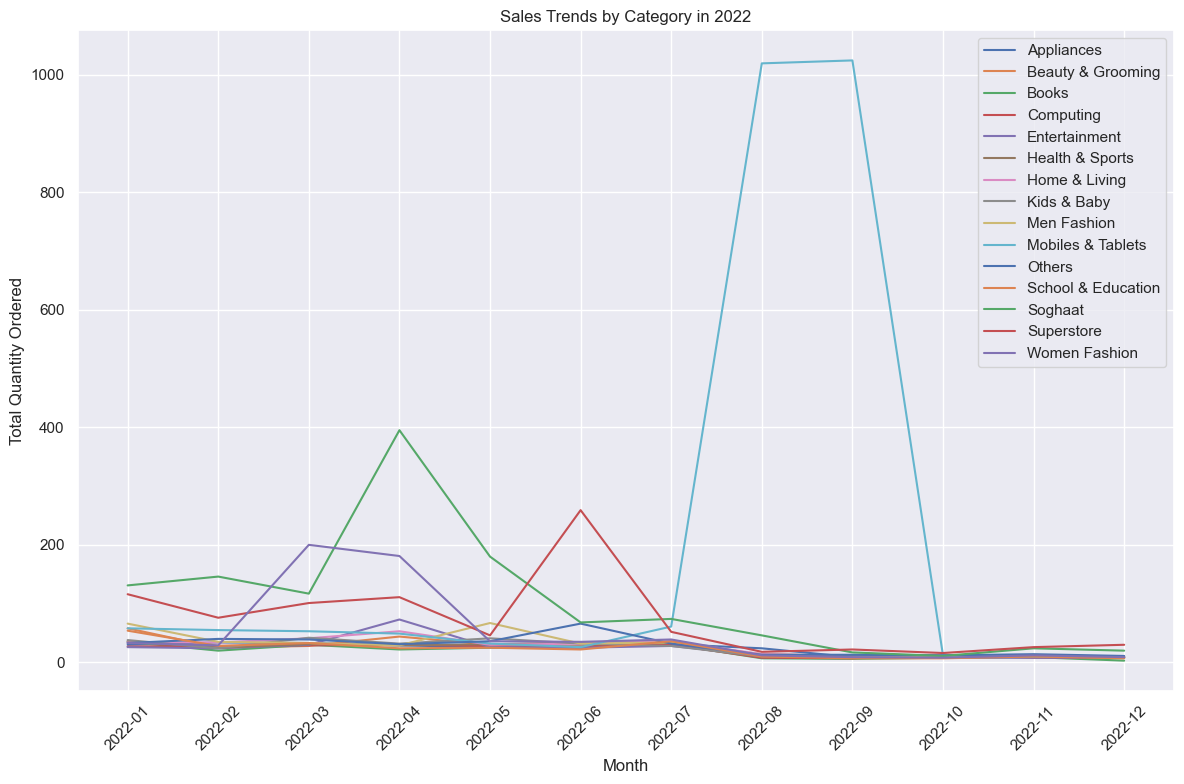

In [41]:
# Step 4: Plot Sales Trends by Category for 2022

# Create the plot
plt.figure(figsize=(12, 8))

# Plot sales trends for each category
for category in sales_by_category['category'].unique():
    category_data = sales_by_category[sales_by_category['category'] == category]
    plt.plot(category_data['month'].astype(str), category_data['qty_ordered'], label=category)

# Set the plot title and labels
plt.title('Sales Trends by Category in 2022')
plt.xlabel('Month')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Question 2

Dear Data Analyst,

Finding Products with the Largest Decrease in Sales Between Two Periods (e.g., 2022 vs 2021) Scenario: The Sales Team would like to identify which products had the most significant decrease in sales between two periods (e.g., 2021 and 2022). Requirements: 1. Create two datasets for each period (e.g., 2021 and 2022), aggregated by product (sku_name). 2. Calculate the sales difference between the two periods. 3. Identify the products with the largest decrease in sales and show the top 10 products. 4. Create a bar chart to visualize the products with the largest decrease in sales. Key Features to Use: • sku_name (for product names) • order_date (for filtering by year) • qty_ordered (for sales data)


In [42]:
# Create dataframe for 2021 sales aggregated by sku_name
sales_2021 = pd.DataFrame(
    df[
        (df['order_date'].dt.year == 2021) &
        (df['is_valid'] == 1)
    ]
    .groupby('sku_name')['qty_ordered']
    .sum()
    .reset_index(name='qty_2021')
)

# Create dataframe for 2022 sales aggregated by sku_name
sales_2022 = pd.DataFrame(
    df[
        (df['order_date'].dt.year == 2022) &
        (df['is_valid'] == 1)
    ]
    .groupby('sku_name')['qty_ordered']
    .sum()
    .reset_index(name='qty_2022')
)

# Merge the two datasets on sku_name using outer join
sales_diff = sales_2021.merge(sales_2022, on='sku_name', how='outer')

# Fill missing values with 0 (in case a product was sold only in one year)
sales_diff = sales_diff.fillna(0)

# Calculate the sales difference
sales_diff['sales_change'] = sales_diff['qty_2022'] - sales_diff['qty_2021']

# Filter for largest decreases (negative changes) and get top 10
top_decreases = sales_diff.sort_values(by='sales_change').head(10)

# Display the result
top_decreases


,sku_name,qty_2021,qty_2022,sales_change
545,RS_Plain Rusk,160.0,0.0,-160.0
531,RB_Dettol Germ Busting Kit-bf,200.0,45.0,-155.0
532,RB_Household Bundle,113.0,0.0,-113.0
537,RS_Baklawa 500gm,107.0,18.0,-89.0
542,RS_Honey Dry Fruit Halwa,52.0,0.0,-52.0
144,CA_shirt-Small,50.0,0.0,-50.0
548,RS_Soan Papri-250gm,51.0,7.0,-44.0
937,jn_900g,54.0,10.0,-44.0
440,Mardaz_MDZ-P-18-M,34.0,0.0,-34.0
676,Topline_Waheed Murad His Life and Our Times,41.0,10.0,-31.0


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Step 1: Filter and aggregate data for 2021 and 2022 by product (sku_name)
# Filter data for 2021
df_2021 = df[df['order_date'].dt.year == 2021]
df_2021_sales = df_2021.groupby('sku_name')['qty_ordered'].sum().reset_index()

# Filter data for 2022
df_2022 = df[df['order_date'].dt.year == 2022]
df_2022_sales = df_2022.groupby('sku_name')['qty_ordered'].sum().reset_index()

# Merge the two datasets on 'sku_name' to get both years' sales in one dataframe
sales_comparison = pd.merge(df_2021_sales, df_2022_sales, on='sku_name', how='outer', suffixes=('_2021', '_2022'))

# Step 2: Calculate the sales difference between 2021 and 2022
sales_comparison['sales_diff'] = sales_comparison['qty_ordered_2022'] - sales_comparison['qty_ordered_2021']

# Step 3: Identify the products with the largest decrease in sales
sales_comparison['sales_diff'] = sales_comparison['sales_diff'].fillna(0)  # Handle any missing values (if a product was only sold in one year)
sales_comparison = sales_comparison.sort_values(by='sales_diff')

# Show the top 10 products with the largest decrease in sales
top_10_decrease = sales_comparison.head(10)

# Print top 10 products with the largest decrease in sales
print("Top 10 Products with the Largest Decrease in Sales:")
print(top_10_decrease[['sku_name', 'sales_diff']])


Top 10 Products with the Largest Decrease in Sales:
                                         sku_name  sales_diff
683                 RB_Dettol Germ Busting Kit-bf      -150.0
691                              RS_Baklawa 500gm       -89.0
1209                                      jn_900g       -49.0
702                           RS_Soan Papri-250gm       -44.0
861   Topline_Waheed Murad His Life and Our Times       -36.0
1534                       vitamin_Ultra Creatine       -24.0
697                                 RS_Kaju Barfi       -21.0
832                           Telemall_MM-DR-HB-L       -21.0
523                     MDF 018_Ajwa Dates 250 gm       -18.0
1046                   cr_CASHEW NUT PLAIN-500 GM       -17.0


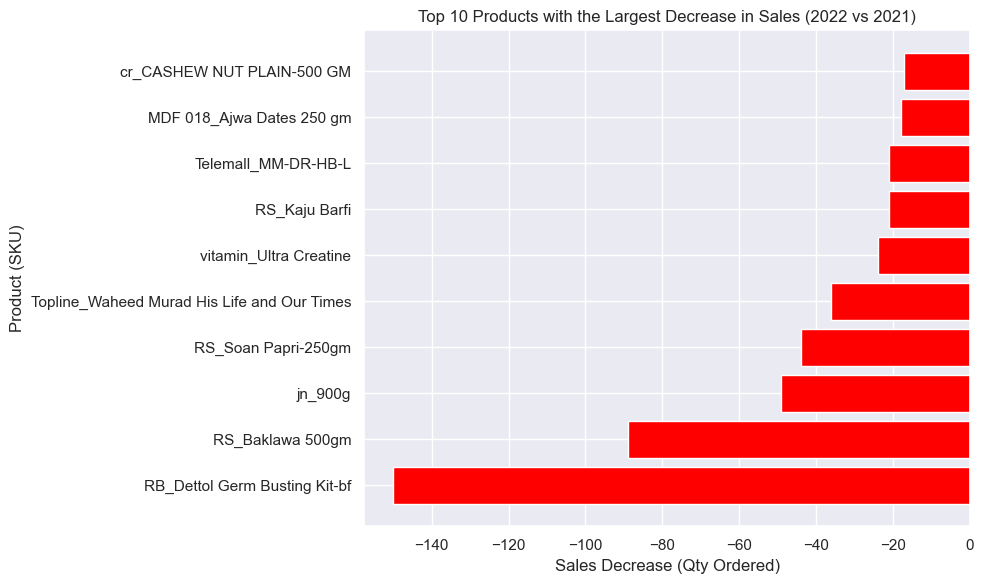

In [44]:
# Step 4: Create a Bar Chart to visualize the products with the largest decrease in sales
plt.figure(figsize=(10, 6))

# Plot a bar chart for the top 10 products with the largest decrease in sales
plt.barh(top_10_decrease['sku_name'], top_10_decrease['sales_diff'], color='red')

# Set the plot title and labels
plt.title('Top 10 Products with the Largest Decrease in Sales (2022 vs 2021)')
plt.xlabel('Sales Decrease (Qty Ordered)')
plt.ylabel('Product (SKU)')

# Display the plot
plt.tight_layout()
plt.show()


Question 3

Dear Data Analyst,

Product Category Performance by Net Profit Scenario: The Operations Team wants to analyze the net profit for each product category to identify the most profitable categories. Requirements: • Create a bar chart that shows the total net profit (SUM(after_discount - cogs)) for each product category. • Sort the categories by the highest to lowest net profit. • Include a slicer to filter by year. Key Features to Use: • category • after_discount • cogs

In [45]:
# Set the year for filtering (this acts as your slicer)
selected_year = 2022

# Filter dataset for the selected year and valid records
df_filtered = df[
    (df['order_date'].dt.year == selected_year) &
    (df['is_valid'] == 1)
]

# Calculate net profit (after_discount - cogs), then aggregate by category
net_profit_df = pd.DataFrame(
    df_filtered
    .assign(net_profit = df_filtered['after_discount'] - df_filtered['cogs'])
    .groupby('category')['net_profit']
    .sum()
    .reset_index()
    .sort_values(by='net_profit', ascending=False)
)

# Display the result
net_profit_df


,category,net_profit
9,Mobiles & Tablets,6.672866e+08
4,Entertainment,1.286789e+08
0,Appliances,8.781125e+07
3,Computing,6.212399e+07
14,Women Fashion,4.081816e+07
8,Men Fashion,3.221868e+07
6,Home & Living,2.913943e+07
13,Superstore,2.075112e+07
1,Beauty & Grooming,1.626365e+07
5,Health & Sports,1.548891e+07


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Step 1: Create a new column for Net Profit (after_discount - cogs)
df['net_profit'] = df['after_discount'] - df['cogs']

# Step 2: Extract the year from order_date for filtering
df['year'] = df['order_date'].dt.year

# Step 3: Aggregate net profit by category
category_profit = df.groupby('category')['net_profit'].sum().reset_index()

# Step 4: Sort the categories by net profit (highest to lowest)
category_profit = category_profit.sort_values(by='net_profit', ascending=False)

# Step 5: Filter by year if needed (e.g., filter for a specific year like 2022)
# You can change the year (2022 in this case) or provide a dynamic slicer in the dashboard
selected_year = 2022  # Change this to the desired year
df_year_filtered = df[df['year'] == selected_year]

# Aggregate net profit for the selected year
category_profit_year = df_year_filtered.groupby('category')['net_profit'].sum().reset_index()
category_profit_year = category_profit_year.sort_values(by='net_profit', ascending=False)

# Print the net profit by category for the selected year
print("Net Profit by Category for", selected_year)
print(category_profit_year)


Net Profit by Category for 2022
              category    net_profit
9    Mobiles & Tablets  1.498853e+09
4        Entertainment  3.284541e+08
0           Appliances  2.097472e+08
3            Computing  1.849388e+08
14       Women Fashion  6.237598e+07
8          Men Fashion  4.625273e+07
6        Home & Living  4.358259e+07
1    Beauty & Grooming  3.845714e+07
13          Superstore  2.657743e+07
5      Health & Sports  2.604143e+07
12             Soghaat  2.048218e+07
10              Others  1.569417e+07
7          Kids & Baby  1.082862e+07
11  School & Education  6.115499e+06
2                Books  3.700191e+06


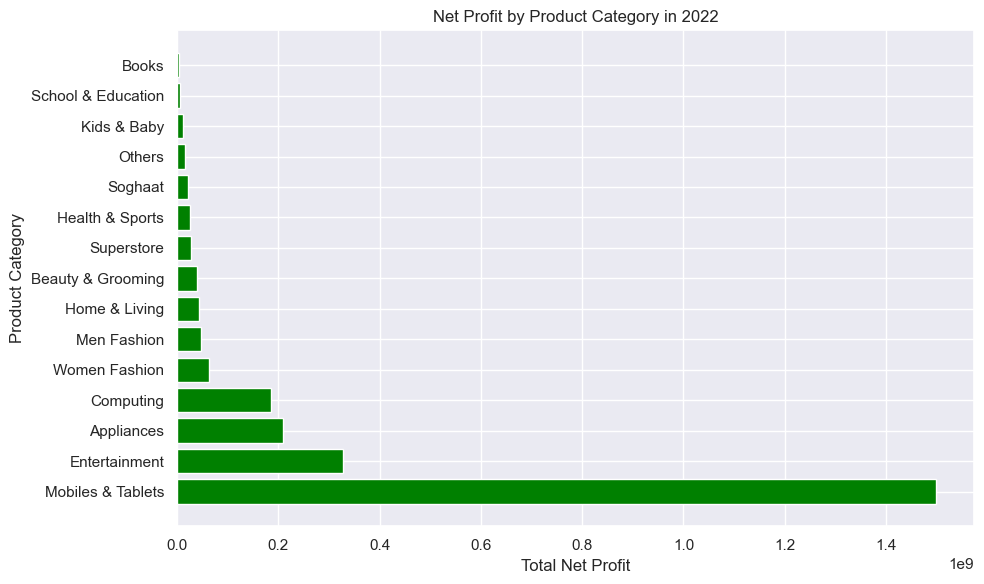

In [47]:
# Step 6: Create a bar chart to visualize the net profit by category
plt.figure(figsize=(10, 6))

# Plot bar chart for categories sorted by net profit
plt.barh(category_profit_year['category'], category_profit_year['net_profit'], color='green')

# Set the plot title and labels
plt.title(f'Net Profit by Product Category in {selected_year}')
plt.xlabel('Total Net Profit')
plt.ylabel('Product Category')

# Display the plot
plt.tight_layout()
plt.show()


Question 4

Dear Data Analyst,

Total Revenue vs Discount Impact by Category Scenario: The Marketing Team wants to analyze the total revenue for each product category before and after applying discounts. They also want to visualize the discount impact on revenue across different categories. Requirements: • Create a bar chart showing total revenue (before and after discount) for each product category. • Use the formula SUM(before_discount) for total revenue before discount and SUM(after_discount) for total revenue after discount. • Add a calculated field to show the discount impact (before_discount - after_discount). • Visualize the difference in revenue for each category. Key Features to Use: • category • before_discount • after_discount

In [48]:
# Set the year for filtering (this acts as your slicer)
selected_year = 2022

# Filter dataset for the selected year and valid records
df_filtered = df[
    (df['order_date'].dt.year == selected_year) & 
    (df['is_valid'] == 1)
]

# Calculate total revenue before and after discount, then aggregate by category
revenue_df = pd.DataFrame(
    df_filtered
    .groupby('category')[['before_discount', 'after_discount']]
    .sum()
    .reset_index()
)

# Calculate discount impact
revenue_df['discount_impact'] = revenue_df['before_discount'] - revenue_df['after_discount']

# Sort the categories by discount impact (optional)
revenue_df = revenue_df.sort_values(by='discount_impact', ascending=False)

# Display the result
revenue_df


,category,before_discount,after_discount,discount_impact
3,Computing,2.154594e+08,2.140285e+08,1430813.60
0,Appliances,3.106848e+08,3.095840e+08,1100840.00
4,Entertainment,3.615207e+08,3.604653e+08,1055423.10
13,Superstore,3.347877e+07,3.264327e+07,835506.24
5,Health & Sports,5.299663e+07,5.226358e+07,733050.40
14,Women Fashion,9.349171e+07,9.301497e+07,476737.38
10,Others,2.219208e+07,2.174465e+07,447429.98
8,Men Fashion,1.340795e+08,1.337033e+08,376217.00
6,Home & Living,7.985365e+07,7.948372e+07,369929.80
9,Mobiles & Tablets,9.131736e+08,9.128256e+08,348000.00


In [49]:
import pandas as pd

# Assuming `df` is your DataFrame

# Set the year for filtering (this acts as your slicer)
selected_year = 2022

# Filter dataset for the selected year and valid records
df_filtered = df[
    (df['order_date'].dt.year == selected_year) & 
    (df['is_valid'] == 1)
]

# Calculate total revenue before and after discount, then aggregate by category
revenue_df = pd.DataFrame(
    df_filtered
    .groupby('category')[['before_discount', 'after_discount']]
    .sum()
    .reset_index()
)

# Calculate discount impact
revenue_df['discount_impact'] = revenue_df['before_discount'] - revenue_df['after_discount']

# Sort the categories by discount impact (optional)
revenue_df = revenue_df.sort_values(by='discount_impact', ascending=False)

# Display the result
print(revenue_df)


              category  before_discount  after_discount  discount_impact
3            Computing     2.154594e+08    2.140285e+08       1430813.60
0           Appliances     3.106848e+08    3.095840e+08       1100840.00
4        Entertainment     3.615207e+08    3.604653e+08       1055423.10
13          Superstore     3.347877e+07    3.264327e+07        835506.24
5      Health & Sports     5.299663e+07    5.226358e+07        733050.40
14       Women Fashion     9.349171e+07    9.301497e+07        476737.38
10              Others     2.219208e+07    2.174465e+07        447429.98
8          Men Fashion     1.340795e+08    1.337033e+08        376217.00
6        Home & Living     7.985365e+07    7.948372e+07        369929.80
9    Mobiles & Tablets     9.131736e+08    9.128256e+08        348000.00
11  School & Education     1.760880e+07    1.736247e+07        246334.70
12             Soghaat     1.778120e+07    1.765833e+07        122873.00
2                Books     6.914354e+06    6.792519

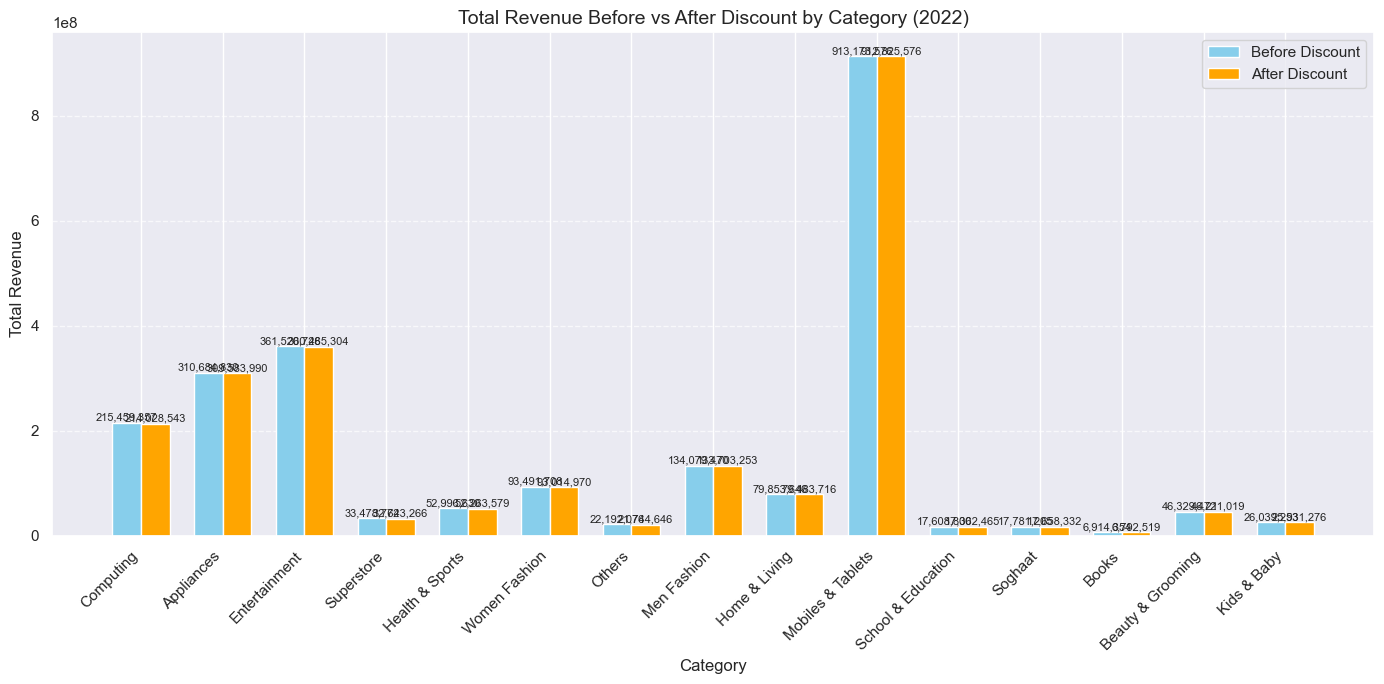

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
categories = revenue_df['category']
before = revenue_df['before_discount']
after = revenue_df['after_discount']
x = np.arange(len(categories))
bar_width = 0.35

plt.figure(figsize=(14, 7))

# Bars
bars1 = plt.bar(x, before, width=bar_width, label='Before Discount', color='skyblue')
bars2 = plt.bar(x + bar_width, after, width=bar_width, label='After Discount', color='orange')

# Add formatted values on top of bars (with comma)
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', ha='center', va='bottom', fontsize=8)

# Labels and Layout
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.title(f'Total Revenue Before vs After Discount by Category ({selected_year})', fontsize=14)
plt.xticks(x + bar_width / 2, categories, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [51]:
import os

# Get home directory and save path
home_path = os.path.expanduser("~")
file_path = os.path.join(home_path, "finaldataset.csv")

try:
    df.to_csv(file_path, index=False)
    print(f"File successfully saved to:\n{file_path}")
except Exception as e:
    print(f"⚠️ Error: {e}")


File successfully saved to:
C:\Users\Asus\finaldataset.csv


In [52]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Asus\finaldataset.csv")
df.head()


,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,base_price,cogs,category,registered_date,payment_method,month_id,month_name,day_name,year,net_profit
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,...,26100.0,18270.0,Others,2021-07-07,jazzwallet,11,November,Friday,2021,2591730.00
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,...,1971942.0,1321182.0,Entertainment,2021-11-20,jazzwallet,11,November,Friday,2021,6073600.50
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,...,7482000.0,5162580.0,Entertainment,2021-11-19,Payaxis,11,November,Thursday,2021,254075.38
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,...,3593680.0,3054628.0,Appliances,2021-11-03,jazzwallet,11,November,Monday,2021,-916388.40
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,...,4413220.0,3177472.0,Appliances,2021-07-05,Payaxis,11,November,Sunday,2021,176575.20
